<span style="font-size: 24px;">Installing required libraries<span>

In [ ]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scipy

<span style="font-size: 24px;">Importing Libraries and Data Loading<span>

In [10]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
file_path = 'D:/backend assignments/assignment 2/traffic/traffic.csv'


<span style="font-size: 24px;">Summary of the data<span>

In [11]:
df = pd.read_csv(file_path)

print("First 5 rows of the dataset:")
print(df.head())

print("\nSummary of the dataset:")
print(df.info())

missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values[missing_values > 0].to_string())

print("\nBasic statistics for numerical columns:")
print(df.describe().to_string())


First 5 rows of the dataset:
   event        date       country      city  \
0  click  2021-08-21  Saudi Arabia    Jeddah   
1  click  2021-08-21  Saudi Arabia    Jeddah   
2  click  2021-08-21         India  Ludhiana   
3  click  2021-08-21        France   Unknown   
4  click  2021-08-21      Maldives      Malé   

                              artist          album          track  \
0                             Tesher    Jalebi Baby    Jalebi Baby   
1                             Tesher    Jalebi Baby    Jalebi Baby   
2                      Reyanna Maria      So Pretty      So Pretty   
3  Simone & Simaria, Sebastian Yatra  No Llores Más  No Llores Más   
4                             Tesher    Jalebi Baby    Jalebi Baby   

           isrc                                linkid  
0  QZNWQ2070741  2d896d31-97b6-4869-967b-1c5fb9cd4bb8  
1  QZNWQ2070741  2d896d31-97b6-4869-967b-1c5fb9cd4bb8  
2  USUM72100871  23199824-9cf5-4b98-942a-34965c3b0cc2  
3  BRUM72003904  35573248-4e49-47c7-a

<span style="font-size: 24px;">Total and Daily Pageview Events<span>

In [12]:
df = pd.read_csv(file_path)

df['date'] = pd.to_datetime(df['date'])

total_pageviews = df[df['event'] == 'click'].shape[0]
print(f"Total Pageviews during the entire period: {total_pageviews}")

daily_pageviews = df[df['event'] == 'click'].groupby('date').size()

average_pageviews_per_day = daily_pageviews.mean()
print(f"Average Pageviews per Day: {average_pageviews_per_day:.2f}")

print("\nDaily Pageviews:")
print(daily_pageviews)


Total Pageviews during the entire period: 55732
Average Pageviews per Day: 7961.71

Daily Pageviews:
date
2021-08-19    9207
2021-08-20    8508
2021-08-21    8071
2021-08-22    7854
2021-08-23    7315
2021-08-24    7301
2021-08-25    7476
dtype: int64


<span style="font-size: 24px;">Analysis of Other Events<span>

Total count of each event type:
event
pageview    142015
click        55732
preview      28531
Name: count, dtype: int64

Distribution of each event type (as percentage):
event
pageview    62.761294
click       24.629880
preview     12.608826
Name: proportion, dtype: float64


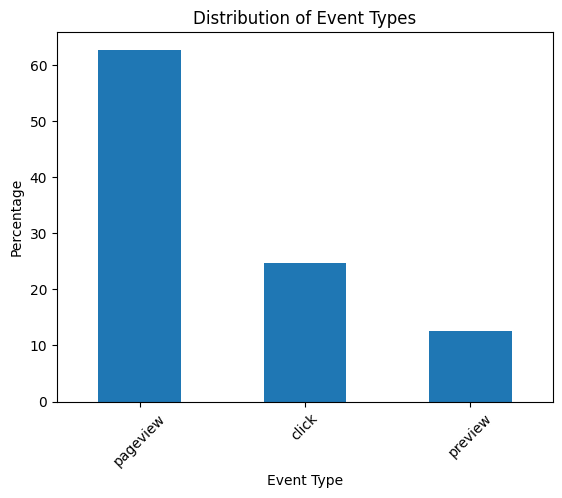

In [13]:
filtered_df = df[df['event'] == 'click']
event_counts = df['event'].value_counts()
print("Total count of each event type:")
print(event_counts)

event_distribution = df['event'].value_counts(normalize=True) * 100
print("\nDistribution of each event type (as percentage):")
print(event_distribution)

event_distribution.plot(kind='bar')
plt.xlabel('Event Type')
plt.ylabel('Percentage')
plt.title('Distribution of Event Types')
plt.xticks(rotation=45)
plt.show()

<span style="font-size: 24px;">Geographical Distribution<span>

Pageviews per country:
country
Afghanistan            2
Albania              489
Algeria              676
American Samoa         4
Andorra                3
                    ... 
Wallis and Futuna      2
Yemen                 83
Zambia               135
Zimbabwe              26
Åland                  6
Length: 211, dtype: int64


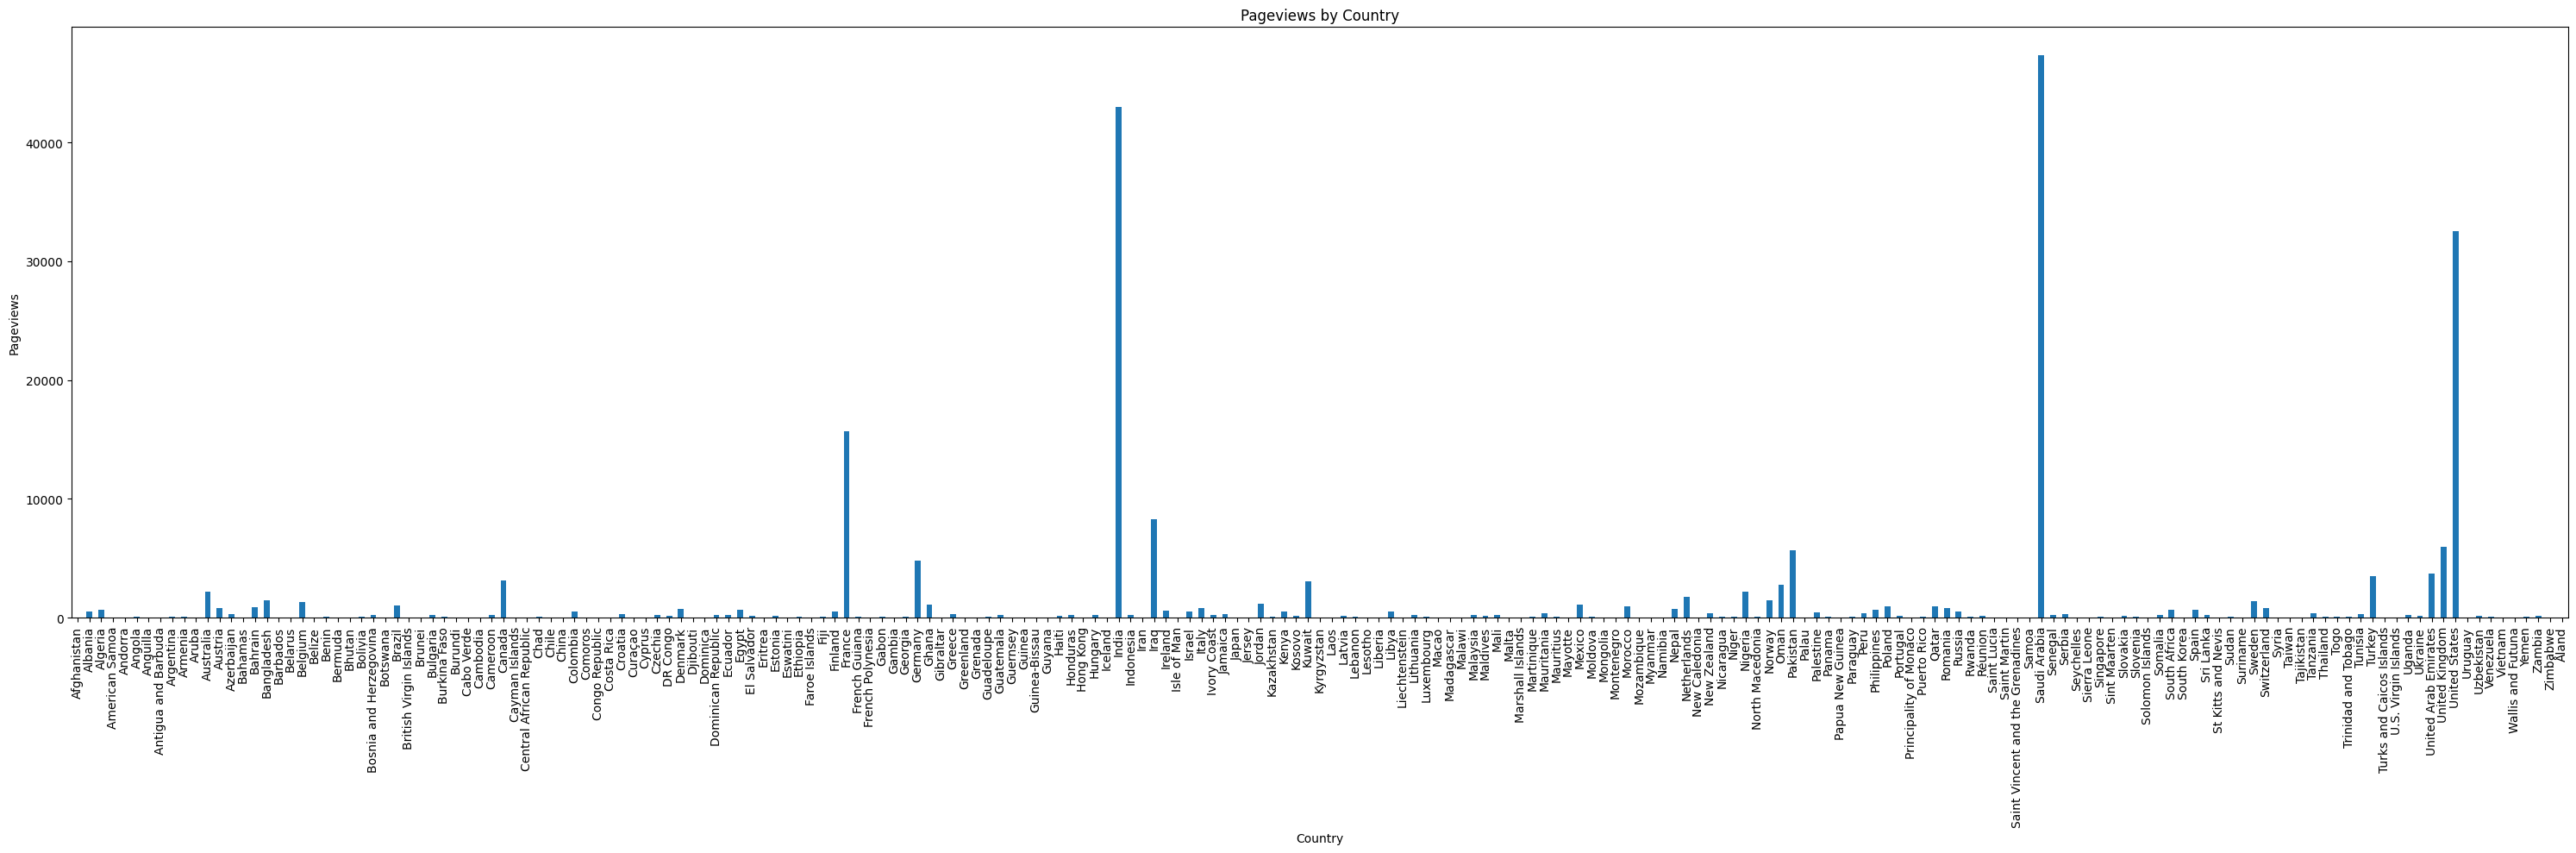

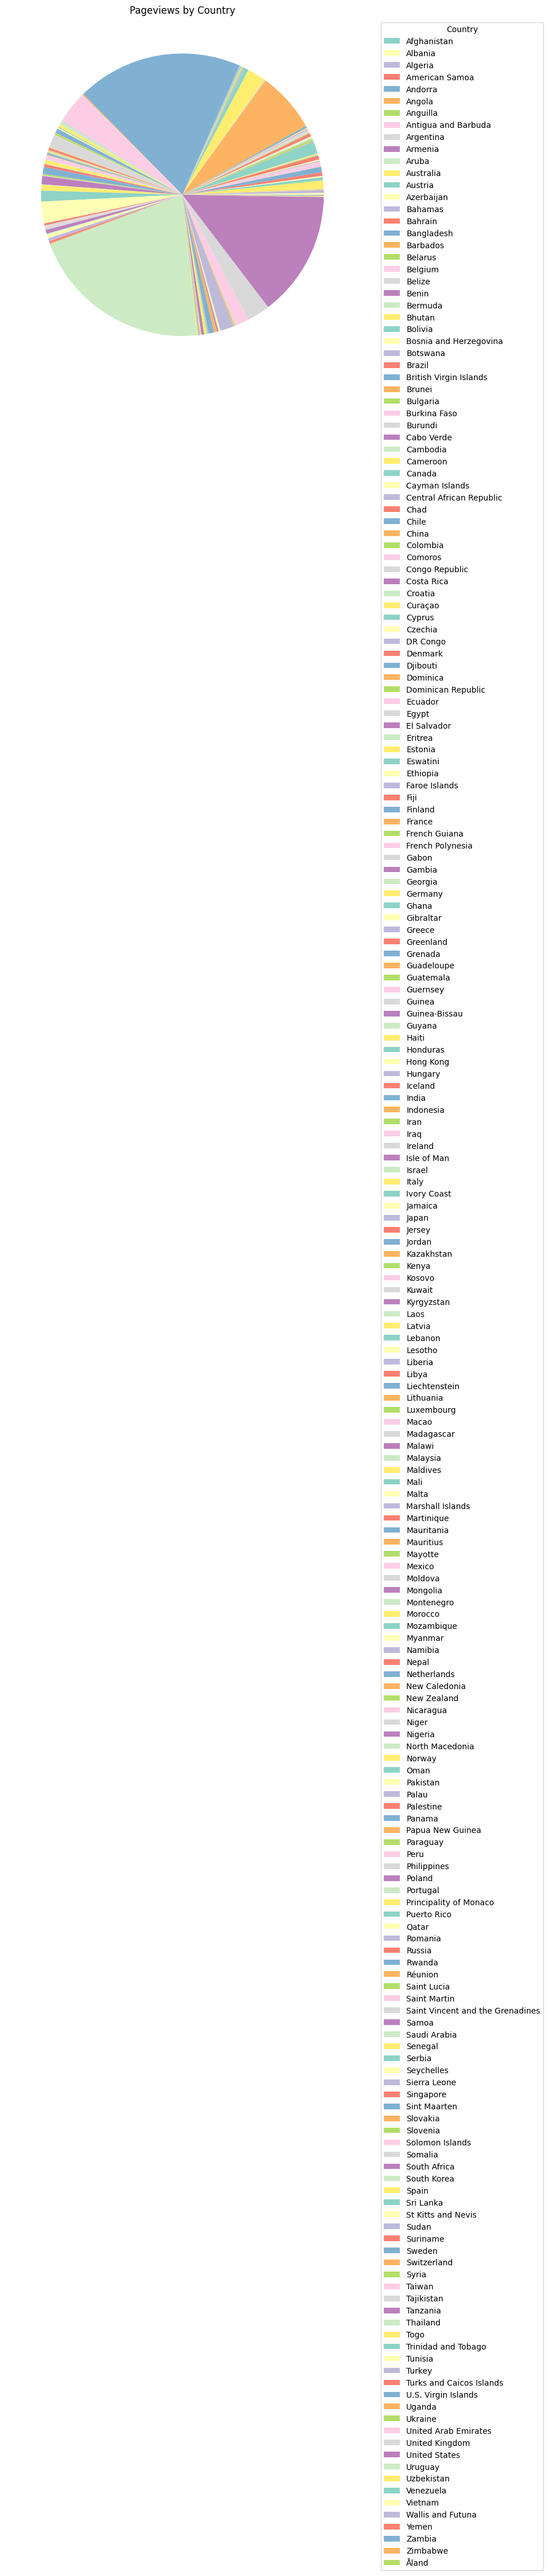

In [14]:
country_pageviews = df.groupby('country').size()
print("Pageviews per country:")
print(country_pageviews)

country_pageviews = df.groupby('country').size()

plt.figure(figsize=(30, 10)) 
country_pageviews.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Pageviews')
plt.title('Pageviews by Country')
plt.xticks(rotation=90)  
plt.tight_layout() 
plt.show()

plt.figure(figsize=(8, 8))  
colors = sns.color_palette('Set3', n_colors=len(country_pageviews))
country_pageviews.plot(kind='pie', labels=None, autopct=None, colors=colors) 
plt.title('Pageviews by Country')
plt.ylabel('') 
plt.legend(country_pageviews.index, title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.show()

<span style="font-size: 24px;">Click-Through Rate (CTR) Analysis<span>

In [15]:

clicks = df[df['event'] == 'click'].shape[0]  
pageviews = df[df['event'] == 'pageview'].shape[0] 

if pageviews > 0:
    overall_ctr = clicks / pageviews
else:
    overall_ctr = 0  

print(f"Total Clicks: {clicks}")
print(f"Total Pageviews: {pageviews}")
print(f"Overall CTR: {overall_ctr:.4f}")

Total Clicks: 55732
Total Pageviews: 142015
Overall CTR: 0.3924


<span style="font-size: 24px;">How does the CTR vary across different links?<span>

Click-Through Rate (CTR) varies across different links, you need to calculate the CTR for each link separately. Here’s a step-by-step approach to achieve this:

Steps
Filter Clicks and Pageviews by Link: Group the data by linkid and calculate the total number of clicks and pageviews for each link.

Calculate CTR for Each Link: Use the formula

CTR = TOTAL CLICK / TOTAL PAGEVIEWS
 
Create a DataFrame with the Results: Display the CTR for each link.

In [16]:

clicks_per_link = df[df['event'] == 'click'].groupby('linkid').size()
pageviews_per_link = df[df['event'] == 'pageview'].groupby('linkid').size()

link_stats = pd.DataFrame({
    'clicks': clicks_per_link,
    'pageviews': pageviews_per_link
}).fillna(0)

link_stats['CTR'] = link_stats['clicks'] / link_stats['pageviews']

print("\nCTR per link ID:")
print(link_stats)



CTR per link ID:
                                      clicks  pageviews  CTR
linkid                                                      
00073307-ae96-5089-a117-4783afb42f8e     0.0        2.0  0.0
00126b32-0c35-507b-981c-02c80d2aa8e7     2.0        2.0  1.0
0018cfff-50a1-5984-9715-01ef2d11a49a     0.0        1.0  0.0
0033934b-5d16-5a06-af58-d087bcdd3680     0.0        1.0  0.0
0034d6cf-3bd8-5ffe-aafc-b3959fc48608     0.0        1.0  0.0
...                                      ...        ...  ...
fff38ca0-8043-50cd-a5f1-f65ebb7105c5     1.0        1.0  1.0
fff4e5f0-4ee5-5fe7-aa30-e870edaf6ed7     0.0        2.0  0.0
fff84c0e-90a1-59d8-9997-adc909d50e16     1.0        1.0  1.0
fffc17a7-f935-5d3e-bd3e-d761fd80d479     1.0        2.0  0.5
fffd0045-29de-522b-b5d8-35786363bf07     1.0        2.0  0.5

[3839 rows x 3 columns]


<span style="font-size: 24px;">Correlation Analysis <span>

To know the correlation between clicks and pageviews on a link, and to assess its statistical significance and strength

1. Calculate the Correlation:

Use the Pearson correlation coefficient to measure the linear relationship between clicks and pageviews.

2. Assess Statistical Significance:

Check the p-value associated with the correlation coefficient to determine if the correlation is statistically significant.

<span style="font-size: 24px;">1.Pearson Correlation Coefficient (Linear Relationship)<span>

In [17]:
clicks_df = df[df['event'] == 'click']
pageviews_df = df[df['event'] == 'pageview']

clicks_per_link = clicks_df.groupby('linkid').size()
pageviews_per_link = pageviews_df.groupby('linkid').size()

data_aggregated = pd.DataFrame({
    'clicks': clicks_per_link,
    'pageviews': pageviews_per_link
}).fillna(0)  

corr_coefficient, p_value = pearsonr(data_aggregated['clicks'], data_aggregated['pageviews'])

print(f"Pearson Correlation Coefficient: {corr_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

Pearson Correlation Coefficient: 0.9940
P-value: 0.0000
The correlation is statistically significant.


<span style="font-size: 24px;">Categorical (Binary) Relationship<span>

In [18]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['event'], df['linkid'])

chi2_stat, p_val, dof, ex = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_val:.4f}")

if p_val < 0.05:
    print("The relationship between events and links is statistically significant.")
else:
    print("No significant relationship between events and links.")

Chi-Square Statistic: 9210.2137
P-value: 0.0000
The relationship between events and links is statistically significant.
